# 6 days data for from Pust elecrtricity substation

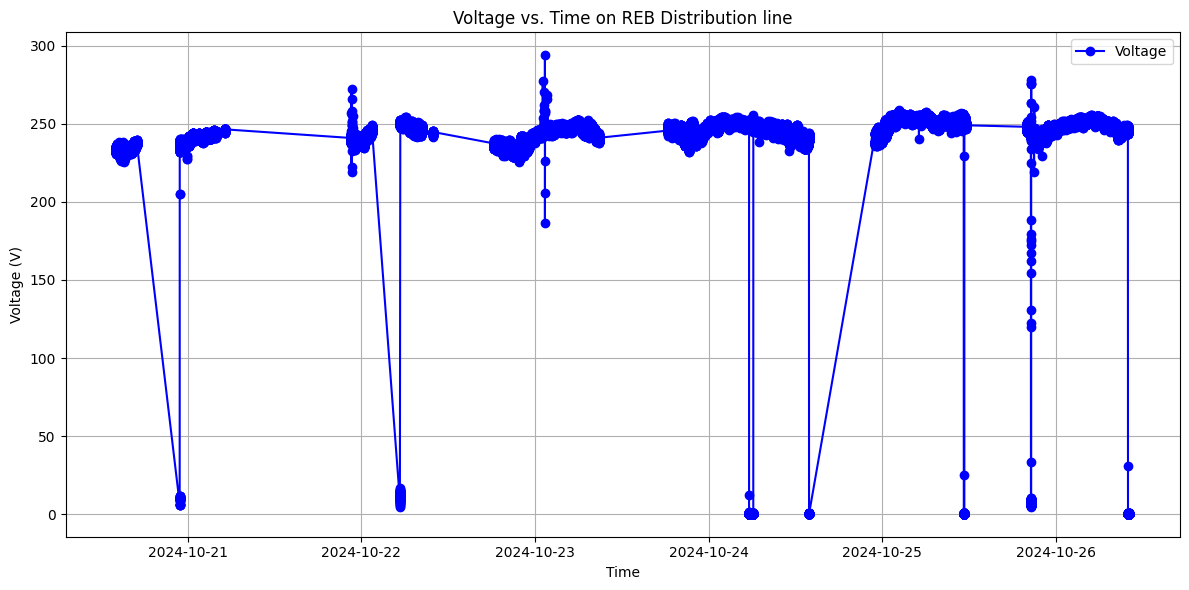

In [1]:
import sqlite3
import matplotlib.pyplot as plt
from datetime import datetime

# List of database file paths
db_paths = ['20-10-2024 dupur.db', '21-10-2024.db', '22-10-24.db', '22.db', '23-10-2024.db', '24-10-24.db', '25-10-2024.db', '26-10-2024.db']  # Replace with your database file paths

# Prepare containers for combined data
timestamps = []
voltages = []

# Iterate over each database and fetch data
for db_path in db_paths:
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()
    
    # Fetch data from the voltage_readings table
    cursor.execute("SELECT timestamp, voltage FROM voltage_readings;")
    data = cursor.fetchall()
    conn.close()
    
    # Append the data to the combined list
    timestamps.extend([datetime.strptime(row[0], '%Y-%m-%d %H:%M:%S.%f') for row in data])
    voltages.extend([row[1] for row in data])

# Sort data by timestamps (if data from multiple databases overlap)
sorted_data = sorted(zip(timestamps, voltages))
timestamps, voltages = zip(*sorted_data)

# Plot voltage vs. time
plt.figure(figsize=(12, 6))
plt.plot(timestamps, voltages, marker='o', linestyle='-', color='b', label='Voltage')
plt.title('Voltage vs. Time on REB Distribution line')
plt.xlabel('Time')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


# 10 second data ploting

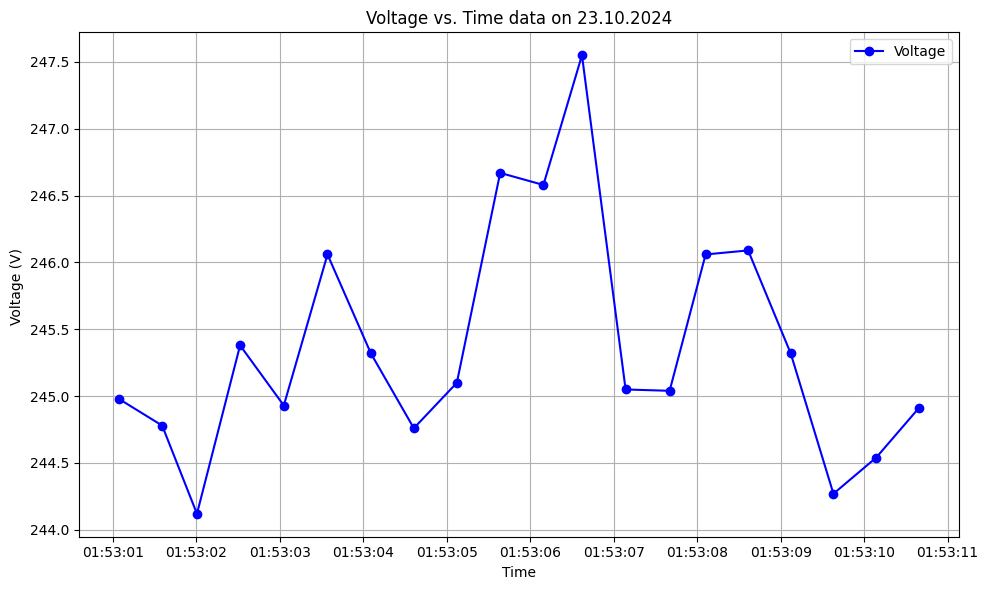

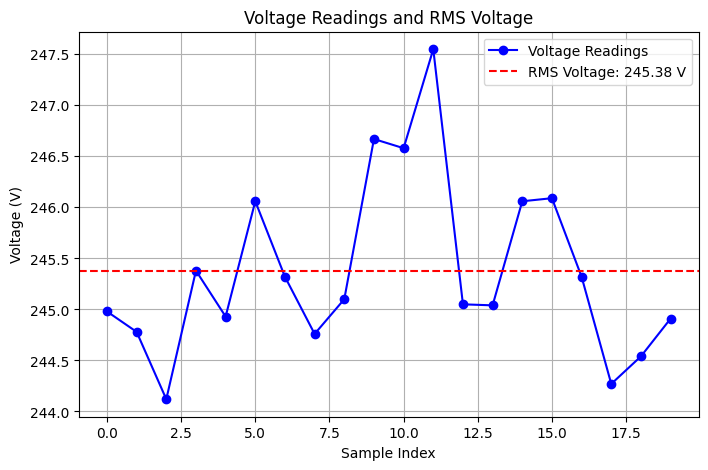

Calculated RMS Voltage: 245.38 V


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path to the uploaded file
file_path ="Small data.xlsx"

# Read the Excel file
data = pd.read_excel(file_path)

# Display the first few rows to understand its structure
data.head()

# Convert the 'timestamp' column to datetime for proper plotting
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract timestamps and voltages
timestamps = data['timestamp']
voltages = data['voltage']

# Plot voltage vs. time
plt.figure(figsize=(10, 6))
plt.plot(timestamps, voltages, marker='o', linestyle='-', color='b', label='Voltage')
plt.title('Voltage vs. Time data on 23.10.2024')
plt.xlabel('Time')
plt.ylabel('Voltage (V) ')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Calculate RMS Voltage
V_rms = np.sqrt(np.mean(voltages**2))

# Plot the voltage values
plt.figure(figsize=(8, 5))
plt.plot(voltages, 'bo-', label="Voltage Readings")
plt.axhline(y=V_rms, color='r', linestyle='--', label=f'RMS Voltage: {V_rms:.2f} V')

# Labels and Title
plt.xlabel("Sample Index")
plt.ylabel("Voltage (V)")
plt.title("Voltage Readings and RMS Voltage")
plt.legend()
plt.grid(True)
plt.show()

# Print RMS voltage
print(f"Calculated RMS Voltage: {V_rms:.2f} V")

# Display the plot
plt.show()



# 12 munites observing the system and stored as .xlsx format

Pump Status Counts:
Status of the water pump
ON     1202
OFF     172
Name: count, dtype: int64


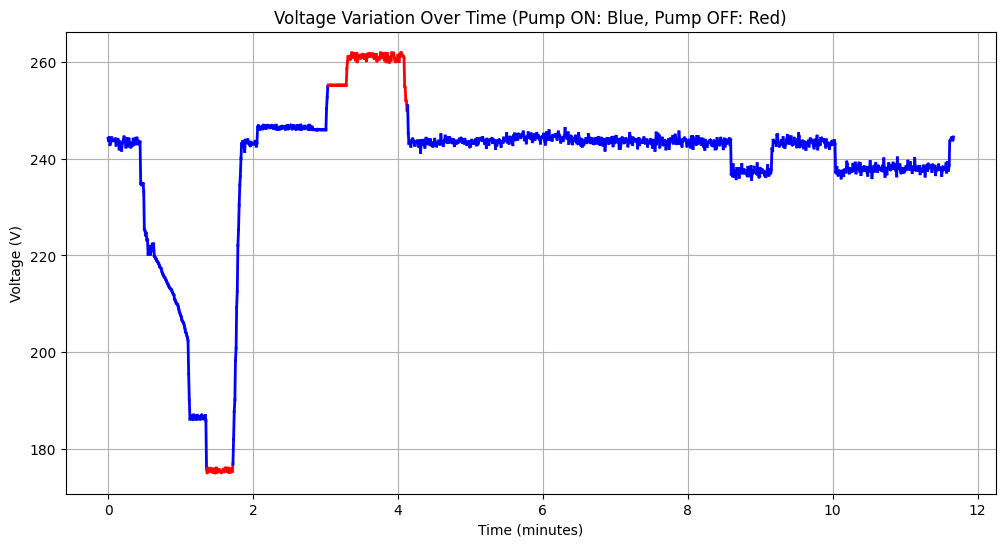

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "24-10-24 small data for 12 munites.xlsx"  # Update with your actual file path
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Ensure the timestamp column is in datetime format
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Convert timestamp to minutes (assuming timestamp is in datetime format)
df["minutes"] = (df["timestamp"] - df["timestamp"].iloc[0]).dt.total_seconds() / 60

# --- 3. Count Pump ON/OFF Status ---
pump_status_counts = df["Status of the water pump"].value_counts()
print("Pump Status Counts:")
print(pump_status_counts)

# --- 4. Voltage Trend Plot with Pump Status Color Coding ---
plt.figure(figsize=(12, 6))

# Create a color map based on the pump status
colors = df["Status of the water pump"].map({"ON": 'b', "OFF": 'r'})

# Plot voltage with different colors based on pump status
for i in range(len(df) - 1):
    plt.plot(df["minutes"].iloc[i:i+2], df["voltage"].iloc[i:i+2], color=colors.iloc[i], linewidth=2)

# Labels and title
plt.xlabel("Time (minutes)")
plt.ylabel("Voltage (V)")
plt.title("Voltage Variation Over Time (Pump ON: Blue, Pump OFF: Red)")
plt.grid()

# Show plot
plt.show()